In [66]:
# import libraries
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import graphviz
%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,mean_squared_error
import joblib


# load data 

In [67]:
df=pd.read_csv('data_salesprice2.csv')

In [68]:
df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,208500,7,1710,2,856,2,2003,2003,196.0,0,706,2.0,65.0,0,854,61
1,181500,6,1262,2,1262,2,1976,1976,0.0,1,978,1.0,80.0,298,0,0
2,223500,7,1786,2,920,2,2001,2002,162.0,1,486,2.0,68.0,0,866,42
3,140000,7,1717,3,756,1,1915,1970,0.0,1,216,0.0,60.0,0,756,35
4,250000,8,2198,3,1145,2,2000,2000,350.0,1,655,2.0,84.0,192,1053,84


In [69]:
# show the describe of price 
df.SalePrice.describe()

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [70]:
# unique values in OverallQual 
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  2], dtype=int64)

# Data visualization 

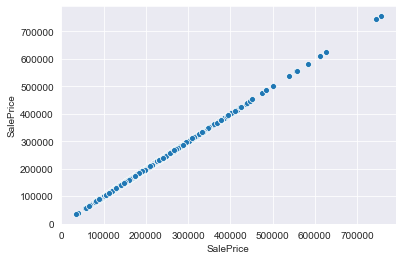

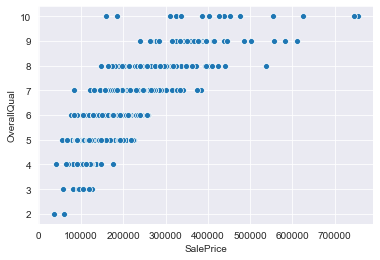

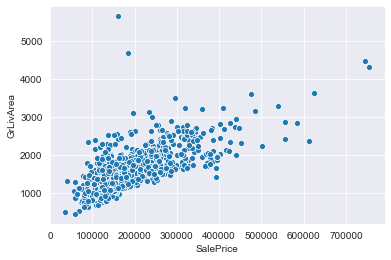

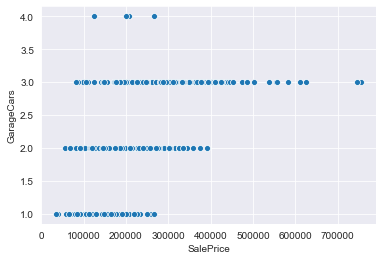

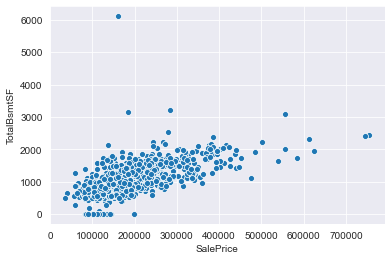

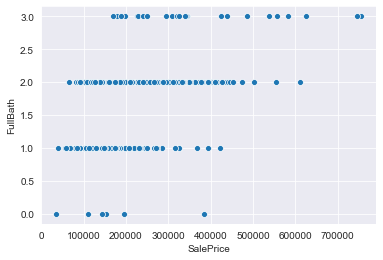

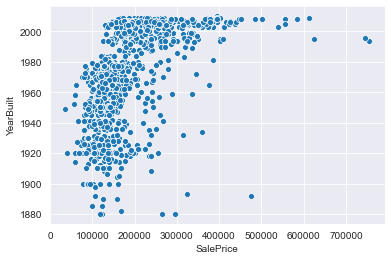

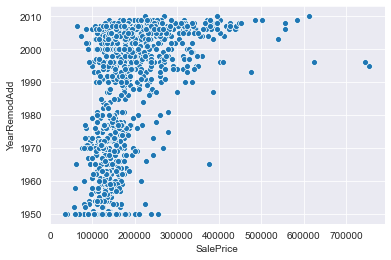

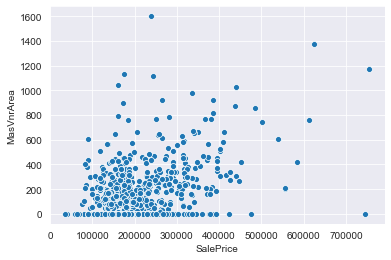

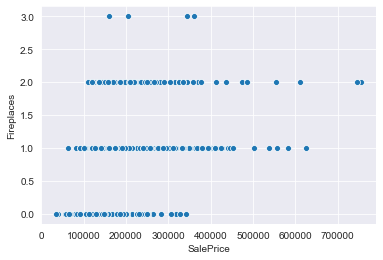

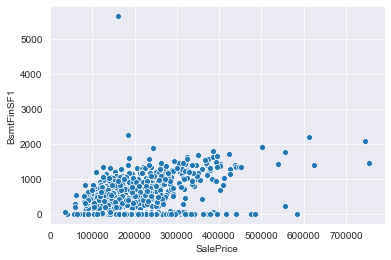

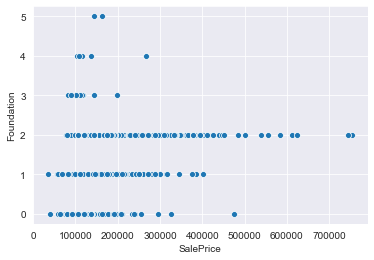

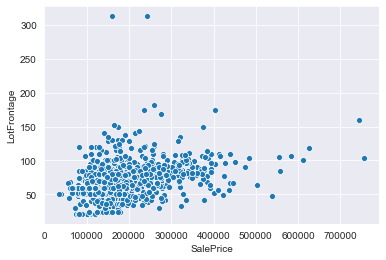

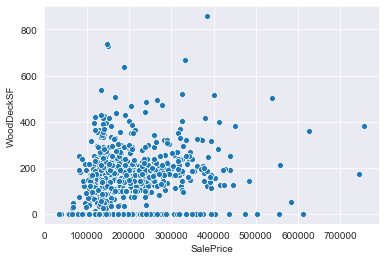

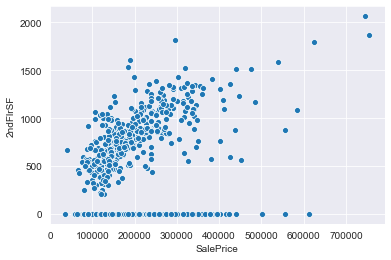

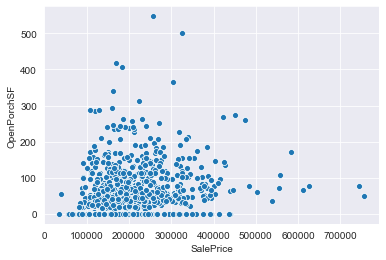

In [71]:
# show the scatter plot between every features (columns )& price 
for feature in df.columns :
    sns.scatterplot(df.SalePrice,df[feature])
    plt.show()

##### notes :
                    we need to remove outliers from data :
                    
                    1- price >=500000
                    2- GrLivArea >=4000
                    3- GarageCars >=4
                    4- TotalBsmtSF >=2500
                    5- MasVnrArea >=1200
                    6- Fireplaces >=3
                    7- Foundation >3
                    8- LotFrontage >=300
                    9- WoodDeckSF >600

#  Data cleaning 

In [72]:
# new data after remove outliers  

df2=df.query('SalePrice<500000 & GrLivArea<4000 & GarageCars<4 & TotalBsmtSF<2500 &MasVnrArea<1200 &Fireplaces<3 &Foundation<=3 &LotFrontage <300 & WoodDeckSF<600')

In [73]:
df2.shape

(1087, 16)

In [74]:
df2.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'Foundation', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF'],
      dtype='object')

# model 

In [75]:
# create X & Y 
# X has  all features without target( saleprice )
X=df2.drop(['SalePrice' ],axis=1)
# y has the target feature  (saleprice )
y=df2[['SalePrice']]

In [76]:
# make scaler to the numbers 
standard_scaler1=StandardScaler()
X_SalePrice=standard_scaler1.fit_transform(X)


In [77]:
standard_scaler2=StandardScaler()
y_SalePrice=standard_scaler2.fit_transform(y)

In [78]:
# seprate the data to train & test 
x_train,x_test,y_train,y_test=train_test_split(X_SalePrice,y_SalePrice,test_size=.25,random_state=33)

In [79]:
# the model 
XGB=XGBRegressor(n_estimators=5000, max_depth=3, learning_rate=0.5)
XGB=XGB.fit(X_SalePrice,y_SalePrice) 
y_pred=XGB.predict(x_test)
mean_squared_error(y_test, y_pred,squared=False)


0.009931575486165438

In [80]:
# save model 
filename = "houses_price_model.joblib"
joblib.dump(XGB, filename)

['houses_price_model.joblib']

In [81]:
# save model standard_scaler
filename = "y_SalePrice.joblib"
joblib.dump(standard_scaler2, filename)

['y_SalePrice.joblib']